<a href="https://colab.research.google.com/github/wangmichelle1/Breast-Cancer-Survival-Analysis/blob/main/Breast_Cancer_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Survival Prediction

# Executive Summary

I aim to predict breast cancer survival in years by using breast cancer patient data from the Netherlands Cancer Institute(NKI). The predictor works by identifying various physiological features and their relation to patient survival. I made various models including k-nearest neighbors, random forest, PCA, and multiple regression to better predict survival. The goal is to make models that allow cancer patients to predict their survival in years given their personal input values such as age, grade, and protein expression. Our best model, multiple regression, is the best in predicting survival given the all the protein expression levels. Regardless, all the models should not be used to actually predict survival as they all represent bad or very weak relationship between the x-variables and y-variable. 

# Introduction

## Motivation
Breast cancer is a prevalent disease that is estimated to kill 43,250 women this year in the US alone, representing one of the leading causes of death for women in the country. Throughout their lifetime, the average woman living in the US has a roughly 13% chance of developing the disease. Breast cancer is a multifactorial disease that presents itself differently in every patient, making it difficult to tailor treatments to individuals. The wide range of individuals who have been diagnosed with breast cancer allows the medical field to learn and approach treating cancer based on past success and recovery in order to help and support those who may experience these difficulties in the future. Therefore, in this project, we will aim to to identify physiological and other factors that may help to predict the survival in years of breast cancer patients after diagnosis. For example, if certain protein expression levels are more common, the industry has guidance on what needs to be improved. This information also empowers cancer patients in understanding their diagnosis and medical situation. One negative outcome is the generalization this data may influence. No patient is the same which causes needs and treatment to vary even when trends exist. Making broad conclusions may cause challenges in treatment of patients who experience less common stages, types or reactions to breast cancer treatment. 


## How will the data be used to solve the problem? 
We will use this data to consider physiological influences such as age, treatment, and genetic factors all as x-variables to see survival (y-variable) in years after diagnosis of a breast cancer patient. We'll use regressors (k-nearest neighbors regressor, decision tree regressor, random forest regressor, multiple regression, LASSO) to try to determine best model(s) for predicting survival years by physiological features (age, treatments, protein expression). 

# Data Description


Our data for the project is from data.world based on data from NKI, or the [Netherlands Cancer Institute](https://data.world/deviramanan2016/nki-breast-cancer-data). The csv file has been already cleaned of any weird formatting, special characters, or missing values. As shown below, we can see that there are 1570 columns and the number of rows (although not shown as we want to look at only the first ten rows) is 272. The columns include physiological factors of a patient such as age, treatment, and protein expressions. Each row represents a breast cancer patient. Also, with only 272 records, this does suggest some reliability issue with regards to the content. With only using close to 300 records to make visualizations as well as construct machine learning models for prediction is risky. However, when looking for breast cancer datasets, we struggled to find a dataset with useful columns (with having x-variables that seem to be able to related to some y-variable) as well as a dataset with many records (rows). This dataset that we have chosen, we believe, balance both of those. Yet, because the dataset does not have a lot of records, the results and conclusions we draw should be taken with caution. Additionally, another reason to take the result/conclusions of our project with caution is the fact that the columns in this dataset are not defined. Even after looking through the website, we have not been able to find definitions for the columns provided by the author. Therefore, we made assumptions as to the meanings of each column based on our intuition. As for the y-variable we will be predicting in our machine learning models, survival is interpretted as the number of years survived by the patient after their diagnosis. However, this means that if a patient has 8 years for survival, they may still live longer, thus actually increasing survival. With this in mind, we acknowledge that our results may be a little inaccurate. 

## Summary of Data Processing Pipeline

### Get data source and read cleaned dataset into dataframe
- Read the csv file with the already cleaned dataset in as a dataframe. We dropped any rows with missing values just in case.

### Check correlation matrix
- Check to see if there is a strong relationship between timerecurrence and survival (interested y-variable). There is, so we will not use timerecurrence column. This goes the same for the eventdeath column where the correlation matrix as well as intuition tells us that eventdeath obviously correlates with survival. Because we are taking a nuanced approach looking to explore x-variables not usually explored with regards to predicting survival, we will not use timerecurrence and eventdeath. We move both all the way to the left to make indexing easier later on. 

### Move columns around
- Move columns around in the dataset for ease in indexing in later on 

### Scale normalization
- Check variance of x-variables to see variability for each. The variance of x-variables are different from another so we scale normalize. We save this scale normalized version of the dataframe as another variable so there's access to both the non-scale normalized version and the scale normalized version.


In [ ]:
import pandas as pd

# read in dataset by turning csv file into a dataframe
df_NKI = pd.read_csv('NKI_cleaned.csv')

# drop any rows with missing values 
df_NKI = df_NKI.dropna()

# show the first 10 rows 
df_NKI.head(10)

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
5,s127,23,42,0,5.037645,2.743326,1,0,1,1,...,-0.417534,-0.141338,-0.492190,0.090633,-0.169754,-0.220211,-0.429283,-0.042797,-0.394709,-0.390144
6,s128,24,50,0,8.739220,8.739220,1,1,0,1,...,0.086751,-0.144424,-0.778273,0.024693,0.204909,-0.043497,-0.172939,-0.013997,-0.437534,0.255511
7,s129,25,43,0,7.567420,7.567420,1,0,0,1,...,-0.003150,0.043824,0.442394,-0.498541,-0.231900,0.029205,-0.078742,-0.241568,-0.841080,-0.680880
8,s130,26,47,0,7.296372,7.296372,1,0,0,1,...,-0.362921,-0.038672,-0.647650,-0.760694,0.146781,0.038366,-0.127822,-0.058059,-1.041802,-0.130038
9,s131,27,39,1,4.662560,1.114305,0,0,0,1,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580


From the data above, we can see that survival and time recurrence seem to have especially similar values, for the most part. This can also be clearly seen through plotting them on a scatterplot as well as a correlation matrix. 

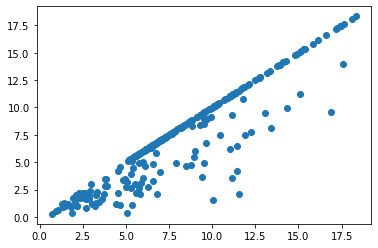

In [ ]:
import matplotlib.pyplot as plt

# input variables - get x and y from dataframe
x = df_NKI.loc[:, 'survival']
y = df_NKI.loc[:, 'timerecurrence']

# plot scatterplot between survival and timerecurrence
plt.scatter(x, y)

In [ ]:
# create correlation matrix for all variables aside from proteins

# get desired column names get all the x-variables aside from proteins 
corr_list = df_NKI.columns[2:15]

# plot correlation matrix
df_NKI.loc[:, corr_list].corr()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil
age,1.000000,-0.147643,0.076966,0.128399,-0.056729,0.237249,-0.000998,-0.003012,-0.027922,-0.125023,-0.107215,0.041293,-0.232466
eventdeath,-0.147643,1.000000,-0.540482,-0.608654,-0.071676,-0.100933,0.066227,-0.007382,0.215344,0.091779,0.359616,0.160251,0.080861
survival,0.076966,-0.540482,1.000000,0.921993,-0.003123,-0.125775,-0.027922,-0.079111,-0.032459,-0.041743,-0.173193,-0.064957,-0.110522
timerecurrence,0.128399,-0.608654,0.921993,1.000000,0.028278,-0.068263,-0.027106,-0.062272,-0.061141,-0.066252,-0.179268,-0.111319,-0.091878
chemo,-0.056729,-0.071676,-0.003123,0.028278,1.000000,0.107452,0.057509,-0.011075,0.091270,0.534215,-0.054515,0.170054,-0.011755
hormonal,0.237249,-0.100933,-0.125775,-0.068263,0.107452,1.000000,0.068120,0.000586,0.036143,0.106643,-0.063109,-0.028454,-0.043668
amputation,-0.000998,0.066227,-0.027922,-0.027106,0.057509,0.068120,1.000000,0.023990,0.303826,0.189845,0.033089,-0.013942,-0.016456
histtype,-0.003012,-0.007382,-0.079111,-0.062272,-0.011075,0.000586,0.023990,1.000000,-0.020887,0.056895,-0.168338,-0.095778,-0.088758
diam,-0.027922,0.215344,-0.032459,-0.061141,0.091270,0.036143,0.303826,-0.020887,1.000000,0.211455,0.344611,0.122802,0.219165
posnodes,-0.125023,0.091779,-0.041743,-0.066252,0.534215,0.106643,0.189845,0.056895,0.211455,1.000000,0.061482,0.185342,0.016788


It is clear from the scatterplot as well as the correlation matrix that the 'timerecurrence' column is heavily correlated with the 'survival column', more specifically, with a 0.92 correlation coefficient from the correlation matrix. Therefore, we have decided to not use the 'timerecurrence' column as a x-variable in the machine learning analysis. This is because if 'timerecurrence' is to be used, it will dominate any influence the other x-variables have on predicting the y-variable, survival. In this case, we will not necessarily remove that column, but rather, move the column to the left of the dataset to make indexing out of the dataset easier later on.

We also want to make note that we thought survival and eventdeath would be correlated. From the correlation matrix, they have a correlation coefficient of about -0.54. Because we are coming from a more nuanced approach, we will not include eventdeath as one of the x-variables because based on intutition, there is at least a moderate relationship between them and we want to explore some x-variables that we are not sure about their relationship with survival. Therefore, we will also move the eventdeath column all the way to the left. 

In [ ]:
# link used to move columns: 
# https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe 

# remove from dataframe the column interested in moving 
column_to_move = df_NKI.pop('timerecurrence')

# add the column back into the specified column index
df_NKI.insert(0, 'timerecurrence', column_to_move)

# display dataframe after column has been moved
df_NKI

,timerecurrence,Patient,ID,age,eventdeath,survival,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,14.817248,s122,18,43,0,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,14.261465,s123,19,48,0,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,6.644764,s124,20,38,0,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,7.748118,s125,21,50,0,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,6.318960,s126,22,38,0,6.436687,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.982204,s71,308,48,1,2.608300,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,3.028063,s72,309,39,1,5.504100,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,2.149213,s73,310,50,1,2.619200,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,2.209446,s75,311,52,1,2.290500,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


In [ ]:
# remove from dataframe the column interested in moving 
column_to_move = df_NKI.pop('eventdeath')

# add the column back into the specified column index
df_NKI.insert(0, 'eventdeath', column_to_move)

# display dataframe after column has been moved
df_NKI

,eventdeath,timerecurrence,Patient,ID,age,survival,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,0,14.817248,s122,18,43,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0,14.261465,s123,19,48,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0,6.644764,s124,20,38,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0,7.748118,s125,21,50,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,0,6.318960,s126,22,38,6.436687,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,1.982204,s71,308,48,2.608300,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,1,3.028063,s72,309,39,5.504100,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,1,2.149213,s73,310,50,2.619200,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,1,2.209446,s75,311,52,2.290500,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


After moving the 'timerecurrence' column all the way to the left column, we also want to consider moving the 'age' column to the right, next to all the x-variables we will actually use. This will make indexing later on easier. 

In [ ]:
# remove from dataframe the column interested in moving 
column_to_move = df_NKI.pop('age')

# add the column back into the specified column index
df_NKI.insert(5, 'age', column_to_move)

# display dataframe after column has been moved
df_NKI

,eventdeath,timerecurrence,Patient,ID,survival,age,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,0,14.817248,s122,18,14.817248,43,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0,14.261465,s123,19,14.261465,48,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0,6.644764,s124,20,6.644764,38,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0,7.748118,s125,21,7.748118,50,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,0,6.318960,s126,22,6.436687,38,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,1.982204,s71,308,2.608300,48,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,1,3.028063,s72,309,5.504100,39,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,1,2.149213,s73,310,2.619200,50,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,1,2.209446,s75,311,2.290500,52,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


Lastly, we also want to move 'barcode' all the way to the left of the dataset since we won't be really using the column. 

In [ ]:
# remove from dataframe the column interested in moving 
column_to_move = df_NKI.pop('barcode')

# add the column back into the specified column index
df_NKI.insert(0, 'barcode', column_to_move)

# display dataframe after column has been moved
df_NKI

,barcode,eventdeath,timerecurrence,Patient,ID,survival,age,chemo,hormonal,amputation,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,6274,0,14.817248,s122,18,14.817248,43,0,0,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,6275,0,14.261465,s123,19,14.261465,48,0,0,0,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,6276,0,6.644764,s124,20,6.644764,38,0,0,0,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,6277,0,7.748118,s125,21,7.748118,50,0,1,0,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,6278,0,6.318960,s126,22,6.436687,38,0,0,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,4321,1,1.982204,s71,308,2.608300,48,1,0,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,4322,1,3.028063,s72,309,5.504100,39,0,0,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,4323,1,2.149213,s73,310,2.619200,50,0,0,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,4325,1,2.209446,s75,311,2.290500,52,0,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


Now, although the dataset it cleaned, we do need to perform scale normalization, which is especially necessarily when we build the machine learning models such as those where distance is important (example: k-nearest neighbors regressor). From below, we can see that the variance in the x-variables we will be using to predict survival: 

In [ ]:
# compute variances for all the possible x-variables we will be using
df_NKI.iloc[:, 6:].var()

age               29.861176
chemo              0.239513
hormonal           0.115259
amputation         0.247450
histtype           0.297753
                    ...    
Contig29014_RC     0.104636
Contig46616_RC     0.088753
NM_000888          0.060526
NM_000898          0.232413
AF067420           0.223516
Length: 1564, dtype: float64

In [ ]:
# get x_feat_list - columns we want to scale normalize
# get x_keep_list - columns we want to keep the same 
x_feat_list = df_NKI.columns[6:]
x_keep_list = df_NKI.columns[0:6]

# scale normalization
df_NKI_scaled = pd.DataFrame()
for feat in x_feat_list:
    df_NKI_scaled[feat] = df_NKI[feat] / df_NKI[feat].std()

# add back into the scaled_df the columns that did not change 
for feat in x_keep_list:
    df_NKI_scaled[feat] = df_NKI[feat]

# see new scale normalized dataframe 
df_NKI_scaled

<ipython-input-10-b318065c94a9>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_NKI_scaled[feat] = df_NKI[feat] / df_NKI[feat].std()
<ipython-input-10-b318065c94a9>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_NKI_scaled[feat] = df_NKI[feat]


,age,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,...,Contig46616_RC,NM_000888,NM_000898,AF067420,barcode,eventdeath,timerecurrence,Patient,ID,survival
0,7.868918,0.000000,0.000000,2.010281,1.832617,2.872459,0.000000,2.506829,3.423351,1.676083,...,0.798403,-0.356195,-0.765731,0.325303,6274,0,14.817248,s122,18,14.817248
1,8.783908,0.000000,0.000000,0.000000,1.832617,2.297967,0.000000,3.760244,3.423351,1.676083,...,-1.566009,-0.941172,-1.333809,-0.029820,6275,0,14.261465,s123,19,14.261465
2,6.953927,0.000000,0.000000,0.000000,1.832617,1.723475,0.000000,2.506829,1.141117,1.676083,...,0.369754,-0.464589,0.536194,-0.420731,6276,0,6.644764,s124,20,6.644764
3,9.149904,0.000000,2.945519,0.000000,1.832617,1.723475,0.474193,2.506829,3.423351,1.676083,...,-0.056358,-1.159842,-0.521037,1.824781,6277,0,7.748118,s125,21,7.748118
4,6.953927,0.000000,0.000000,2.010281,1.832617,1.723475,0.000000,2.506829,2.282234,1.676083,...,-1.362313,-0.217873,-1.404445,0.283772,6278,0,6.318960,s126,22,6.436687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,8.783908,2.043315,0.000000,2.010281,1.832617,3.446951,0.000000,3.760244,1.141117,5.028248,...,0.088284,1.937885,-0.971615,-1.784971,4321,1,1.982204,s71,308,2.608300
268,7.136925,0.000000,0.000000,2.010281,1.832617,3.446951,0.000000,2.506829,1.141117,1.676083,...,-2.834665,-1.454879,-1.215037,0.359556,4322,1,3.028063,s72,309,5.504100
269,9.149904,0.000000,0.000000,2.010281,1.832617,3.102256,0.000000,3.760244,1.141117,1.676083,...,1.986744,-2.076597,0.522520,-1.740347,4323,1,2.149213,s73,310,2.619200
270,9.515900,0.000000,2.945519,2.010281,1.832617,3.217154,0.000000,3.760244,1.141117,1.676083,...,-0.211534,-1.611785,0.740141,0.729921,4325,1,2.209446,s75,311,2.290500


Next, we create two visualizations in order to better understand our dataset before we dive into building machine learning models. When creating these visualizations, we used the non-scale normalized dataframe since we want to plot the actual values. 

## Two Visualizations

In [ ]:
# Age vs event death 
# Countplot
# make new Age_Category column 
# 26-41, 42-45, 46-49, 50-53 -- categories based on min-25%, 25%-50%, 50%-75%, 75%-max
df_NKI['Age_Category'] = '26-41'
df_NKI.loc[(df_NKI['age'] > 41) & (df_NKI['age'] < 46), 
            'Age_Category'] = '42-45'
df_NKI.loc[(df_NKI['age'] > 45) & (df_NKI['age'] < 50), 
            'Age_Category'] = '46-49'
df_NKI.loc[(df_NKI['age'] > 49), 
            'Age_Category'] = '50-53'

In [ ]:
# Code from: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars 
# Used for countplot with color based on another feature
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

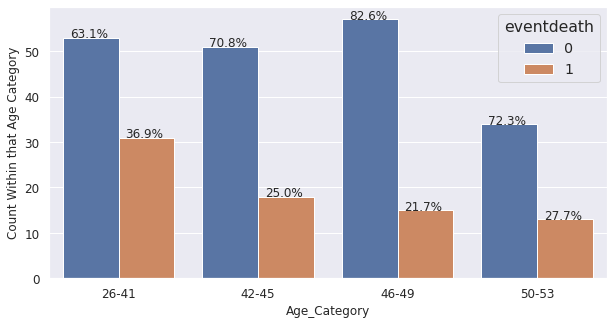

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# use seaborn to make the plot nicer
sns.set(font_scale=1.3)

# plot the countplot and adjust the x and y labels and ticks 
plt.figure(figsize = (10, 5))
ax = sns.countplot(x="Age_Category", data=df_NKI, hue="eventdeath", order = 
                   ['26-41', '42-45', '46-49', '50-53'])
plt.xticks(size = 12)
plt.xlabel("Age_Category", size = 12)
plt.yticks(size = 12)
plt.ylabel('Count Within that Age Category', size = 12)

# call with_hue function to plot countplot with color 
with_hue(ax, df_NKI.Age_Category, 4, 2)

From the countplot, one can see how the liklihood of no death is higher than the liklihood of death across all age categories. One thing to keep in mind that the age categories are determined by the distribution of age for the dataset: 26-41 (min-25%), 42-45 (25%-50%), 46-49 (50%-75%), 50-53 (75%-max). When looking at specifically no death, one can see how the highest probability lies in the age category of 46-49 followed by 50-53, while the 26-41 have the lowest no death. Conclusions that can be drawn is the fact that the two older age cateories together seem to have a greater no death rate as opposed to the younger age categories. This could suggest the fact that more research and attention is given to the older people that may have more susceptibility to these cancers. When looking at the death bars for each age cateogry, one can see that the highest probability lies in the 26-41 age category followed by the 50-53 age category. One can conclude for this that 26-41 may have the greatest death simply because it is not often detected soon enough. Oftentimes, we see young people as healthy and not having to worry too much about diseases such as cancer. Therefore, this could explain the highest level of death here. Of course, the second most is the 50-53 category, where the age factor definitely plays a role. With this conclusions drawn, it should be taken with caution because some of these conclusiosn may simply be due to the small number of records of the dataset. Our dataset only has a little less than 300 records so these conclusions should be taken with caution. 

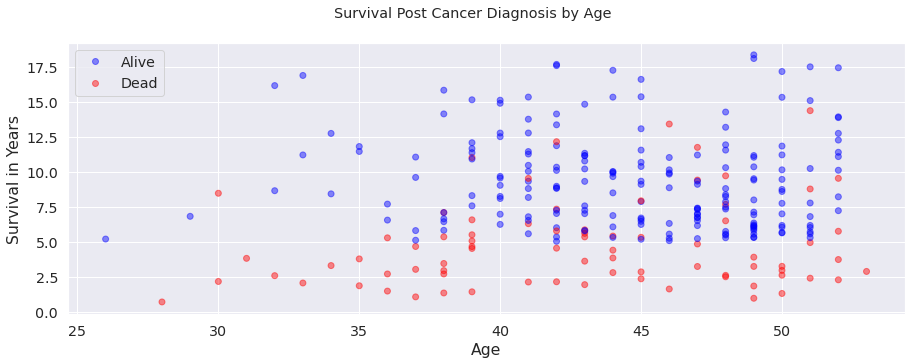

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# define x and y values as well as the variable used for color
# grab the values from the dataframe
age = df_NKI.loc[:, 'age'].values
survival = df_NKI.loc[:, 'survival'].values
status = df_NKI.loc[:, 'eventdeath'].values

# scatter plot age and survival data - color by eventdeath status 
scatter = plt.scatter(age, survival, label='observed', c = status, 
                      cmap = 'bwr', alpha=0.45)

# create color legend
handles, labels = scatter.legend_elements()

# set labels for legend 
labels = ['Alive', 'Dead']
plt.legend(handles, labels)

# use seaborn to make plot look nicer 
sns.set()
# label x and y axis and title 
plt.xlabel('Age')
plt.ylabel('Survival in Years')
plt.suptitle('Survival Post Cancer Diagnosis by Age')
# make graph bigger 
plt.gcf().set_size_inches(15, 5)

From the scatter plot, we are able to make observations about the relationship between patient age, patient survival and eventdeath. The data set lacks thorough decriptions of each column variable so for the purpose of this analysis it is assumed survival represents the length of survival post breast cancer diagnosis for each patient, in years.

It can be observed simply that the majority of patient data comes from older patients. There are also no patients who survived less than five years that are alive. 

There is a trend in length of survival and patient outcome (alive or dead). If the patient survives longer after cancer diagnosis it is more likely that they are alive. Working with alive or dead cancer patient data is challenging because patients monitored may change status after the data collection time frame.

For age vs survival, it is observed that survival length can vary regardless of age. In the younger age range from about 25-35 years the average survival is noticably lower than those in age 35-50+, however it is important to consider the small sample size of patients who are 25-35 and how this may influence conclusions. 

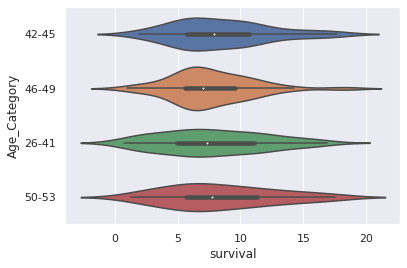

In [ ]:
# Distribution of survival for each age group 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html 
# violinplot - similar to a boxplot in showing statistics, but also shows 
# density of each variable 

import seaborn as sns

# create new Age_Category column 
# 26-41, 42-45, 46-49, 50-53 -- categories based on min-25%, 25%-50%, 50%-75%, 
# 75%-max
df_NKI['Age_Category'] = '26-41'
df_NKI.loc[(df_NKI['age'] > 41) & (df_NKI['age'] < 46), 
            'Age_Category'] = '42-45'
df_NKI.loc[(df_NKI['age'] > 45) & (df_NKI['age'] < 50), 
            'Age_Category'] = '46-49'
df_NKI.loc[(df_NKI['age'] > 49), 
            'Age_Category'] = '50-53'

# plot violinplot for each item in the list, separated by age category 
sns.violinplot(x=df_NKI['survival'], y=df_NKI['Age_Category'])

Here is a violinplot showing distribution of survival for each age category. The age category is determined by the min-25%, 25%-50%, 50%-75%, and 75%-max of all ages in the age column. 

The survival for the 42-45 and 50-53 age category seems higher than that of the 26-41 and 46-49 age category (least to greatest for age category median survival: 46-49, 26-41, 42-45, 50-53). This is interesting in the sense that the survival of the younger age categories has less survival than the older age categories. This can simply be because our dataset is only close to 300 records, or it can suggest that the cases with older people in the dataset are receiving more treatment than others, thus increasing their survival. 

We would like to point out that the 46-49 age category seems to have an especially right skewed distribution (more right skewed than the other age categories that also appear to have a right skewed distribution). This suggests that there the mean of survival for this age category is greater than the suggested median (as indicated on the boxplot portion of the violinplot) due to possible outliers with a high survival in years.  

It is also interesting to note from this violinplot that all the statistics (min, lower quartile, median, upper quartile, max) for all age categories, even though they are different, the difference are quite small. This may suggest some issues in our dataset with regards to the data collected - all having similar survival years. With this revealed, we will try to proceed with caution in our machine learning models later on. 

This graph, regardless, still shows an interesting distribution, whether the insights shown are actually true to breast cancer or whether it is due to our dataset.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

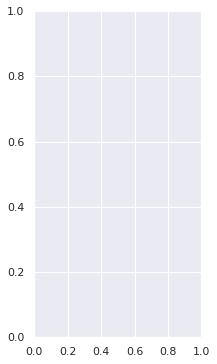

In [ ]:
# install modules
!pip install bioinfokit

# upgrade to latest version
!pip install bioinfokit --upgrade

# import modules
from bioinfokit import analys, visuz

# get last 10 proteins (chosen arbritarily)
df_expression = df_NKI.iloc[:, -6:]

# transpose the data
df_expression_trans = df_expression.transpose()

# create a heatmap
visuz.gene_exp.hmap(df=df_expression_trans, rowclus=False, colclus=False, cmap='RdYlGn', dim=(3, 6), tickfont=(6, 4), show=True)


Text(0.5, 1.0, 'Average survival post cancer diagnosis for each grade')

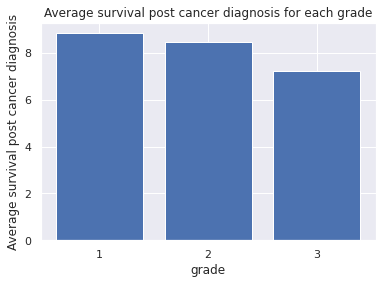

In [ ]:
df_NKI.groupby('grade').mean()['survival'].values
import numpy as np
np.sort(df_NKI['grade'].unique())
# Barplot - for each grade (x-axis), plot the average survival post cancer diagnosis 
# Used this to really explore the meaning of "survival" column which will be our y variable, since it was not given
# in our dataset 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# define x and y values
survival = df_NKI.groupby('grade').mean()['survival'].values
grade = np.sort(df_NKI['grade'].unique())

plt.bar(grade, survival)

plt.xlabel('grade')
plt.xticks(df_NKI['grade'].unique())
plt.ylabel('Average survival post cancer diagnosis')
plt.title('Average survival post cancer diagnosis for each grade')

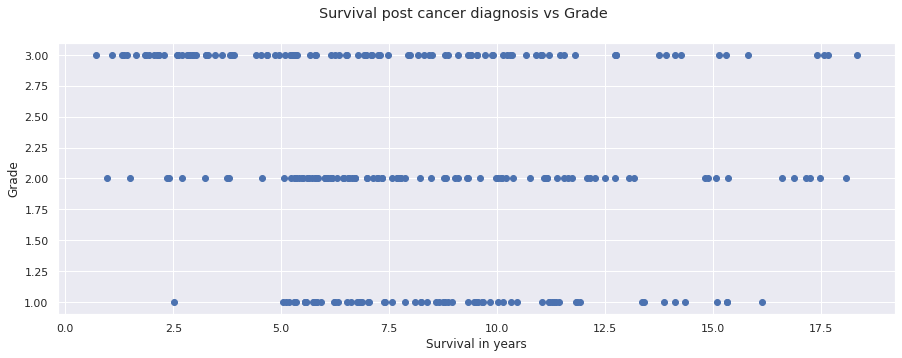

In [ ]:
# Maybe use this? 
# Survival vs Grade 
# grade 1 being the least critical and grade 3 being the most critical
import matplotlib.pyplot as plt
import seaborn as sns
# define x and y values
survival = df_NKI.loc[:, 'survival'].values
grade = df_NKI.loc[:, 'grade'].values
# status = df_NKI.loc[:, 'eventdeath'].values

# scatter plot age and survival data
scatter = plt.scatter(survival, grade, cmap = 'bwr', alpha=1)
# scatter = plt.scatter(survival, grade, label='observed', c = status, cmap = 'bwr', alpha=1)

# Create color legend
# handles, labels = scatter.legend_elements()

# Print out labels to see which appears first
# print(labels)
# labels = ['Alive', 'Dead']
# plt.legend(handles, labels)

# Format and label scatter plot
sns.set()
plt.xlabel('Survival in years')
plt.ylabel('Grade')
plt.suptitle('Survival post cancer diagnosis vs Grade')
plt.gcf().set_size_inches(15, 5)


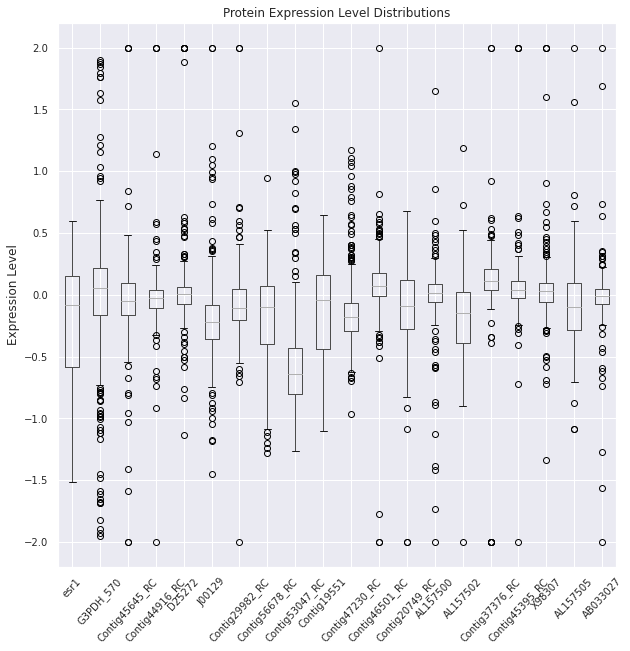

In [ ]:
# investigate an arbitrary selection of 20 of the proteins included in our data to gain 
# more understanding of protein expression in our samples

# create list of the first 20 proteins
protein_list = list(df_NKI.columns[16:36])

# graph distributions of each protein as a box-and-whisker plot
protein_boxplot = df_NKI.boxplot(column = protein_list, rot=47, fontsize=10, figsize= (10,10))
protein_boxplot.plot()
plt.title('Protein Expression Level Distributions')
plt.ylabel('Expression Level')
plt.show()



From the above graph, we can see the five number summary for the protein expression levels. We can infer that since the protein expression levels are positive and negative, this is likely in reference to some baseline '0' of protein expression. There is also a noticable amount of outliers for each protein, giving context to how reliable or unrealiable conclusions based on protein expression may be. Additionally, we can compare the expression of each protein to each other and notice that in this abritary selection of proteins, Contig56678_RC appears to be downregulated as its expression compared to the baseline is lower than the others. This piques interest in Contig56678_RC as potentially more signfiicant in cancer survival outcomes. Furthermore, we can see that the protein AB033027 appears to have less of a spread compared to the other proteins as the box and whisker plot is overall smaller. This might suggest that this protein is not signficantly changed in cancer compared to normal cells. 

# Method


## K-Nearest Neighbors Regressor 

K-nearest neighbors works under the assumption that our data can create meaningful distance measures from data that have similar measures. A scale normalized version of the dataframe will be used to adjust for the difference in variances between the x-variables. The k-nearest neighbors model we build will try to predict survival first based on x-variables aside from protein expression levels, and second, based on only the most importance features (after performing the random forest regressor). The initial k-nearest neighbors model will give us an idea of how other factors aside from the protein expressions impact survival. From there, we will do our best to improve the model (looking at only the most importance features. If the r2 of this model is good, we would be able to investigate further into the prediction of survival given the x-variables that are used to make this good model. A pitful with this method has to do with the simplicity of the model with regards to using distances to draw similarities between the records. 

## Decision Tree Regressor

The decision tree regressor is particularly useful because we can see the specific x-variables that are chosen to be used at each node. The feature and its associated threshold are particularly chosen to minimize the mean mse of the output nodes. The decision tree is a more interactive model as opposed to the k-nearest neighbors model allowing us to follow through and see the final bucket an input leads to. A pitfall with this method is that the final buckets that an input leads to is only a very rough estimate based on the most important features that reduce mse. 

## Random Forest Regressor 

The random forest regressor is very useful for us as we can plot a feature importance graph given that the random forest regressor model is good. However, in our case, even when the random forest regressor may not be the best, we still proceed in making the feature importance graph as this is where we find the most importance features out of all 1500+ x-variables. This is critical in helping us make improved models of k-nearest neighbors, decision tree, PCA, multiple regression, and LASSO. Because we still plot the feature importance graph even though the r2 may be bad for the random forest regressor, this presents a pitfall as we learned in class that no one cares about a feature importance graph if the random forest regressor doesn't work. 

## PCA

We will use an application of the PCA, or Principal Component Analysis, where we will visualize a PCA map by compressing x-variables. In particular, we will compress the most importance x-variables (not all 1500+ variables) into one variable through PCA compression. Then, we will plot that as a scatterplot against survival to see whether there is a relationship. By doing this, we are assuming that we are creating the best PCA model when compressing an arbitrary amount of important x-variables. 

## Multiple Regression

Multiple regression allows the use of many x-variables to predict a y-variable. We used this at our advantage to have an arbitrary amount of the most important x-variables as the input variables against the y-variable of survival. This equation that is generated can possibly be used by those who want to predict their years of survival given that they know their inputs. An assumption clearly made here is how many x-variables to be inputted, as we chose an arbitrary number based on the most important ones as determined by the feature importance graph. The number chosen can definitely impact the multiple regression model generated. 

## LASSO

# Results

## K-Nearest Neighbors Regressor

Here, we are going to build a k-nearest neighbors regressor using the scale normalized dataframe since distances matter when building k-nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

def get_y_pred(df, x_feat_list, y_feat, k=3):
    """ gets the y predictions array of the KNN Regressor
    
    Args:
        df (DataFrame): df with x and y data
        x_feat_list (list): list of x features
        y_feat (str): feature being predicted
        k (int): number of neighbors
        
    Returns:
        y_pred (numpy array): prediction based on regression model 
    """
    
    # extract data into numpy format
    x = df.loc[:, x_feat_list].values
    y_true = df.loc[:, y_feat].values

    # initialize knn_regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # train on training data
    knn_regressor.fit(x, y_true)

    # estimate y variable 
    y_pred = knn_regressor.predict(x)
    
    return y_pred

In [ ]:
# columns of x-variables not including the proteins
x_feat_list = df_NKI_scaled.columns[0:10]
# y-variable column - survival 
y_feat = 'survival'
# call the get_y_pred function to get array of predictions made 
no_cv_pred = get_y_pred(df_NKI_scaled, x_feat_list, y_feat)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# define y_true as all the values of the survival column 
y_true = df_NKI_scaled.loc[:, y_feat].values

# compute r2_score to see the how the k-nearest neighbor regressor model is
r2 = r2_score(no_cv_pred, y_true)
r2

The r2 score here is -0.79, which is very bad. A negative r2 means that the model is worse than the mean of the target values. We will however improve on this and make a improved k-nearest neighbors later on.

## K-Nearest Neighbors Regressor with Cross Validation

Next, we are going to build a k-nearest neighbors regressor with cross validation. The use of cross validation here helps us 
to better predict on survival that we have not seen in the data
set, as opposed to fitting on the whole dataset, which is "cheating" in some sense. Here, we will still use the scale normalized version of the dataset, as we are looking at a k-nearest neighbors regressor where distance is important in the model. 

In [ ]:
# interested y-feature and x-variables (x-variables aside from the protein 
# expression)
# this will be used throughout this section 
y_feat = 'survival'
x_feat_list = df_NKI_scaled.columns[0:10]

In [ ]:
from sklearn.model_selection import KFold

def knn_cross_val(df, x_feat_list, y_feat, k=3, n_splits=10):
    """ fits model on cross-validated regressor    
    
    Args:
        df (DataFrame): df with x and y data
        x_feat_list (list): list of x features
        y_feat (str): feature being predicted 
        k (int): number of neighbors
        n_splits (int): number of folds in cross validation
        
    Returns:
        y_pred (numpy array): prediction based on regression model 
    """
    # extract data into numpy format
    x = df.loc[:, x_feat_list].values
    y_true = df.loc[:, y_feat].values
    
    # initialize empty array same size as y_true
    y_pred = np.empty_like(y_true)
    
    # initialize knn_regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # initialize kfold; specify number of splits and shuffle 
    k_fold = KFold(n_splits=n_splits, shuffle=True)

    for train_idx, test_idx in k_fold.split(x, y_true):
        # get training data
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]

        # get testing data
        x_test = x[test_idx, :]
        y_true_test = y_true[test_idx]

        # train on training data
        knn_regressor.fit(x_train, y_true_train)

        # estimate y_pred
        y_pred[test_idx] = knn_regressor.predict(x_test)
        
    return y_pred


In [ ]:
# call knn_cross_val function to get array of y predictions
cv_y_pred = knn_cross_val(df_NKI_scaled, x_feat_list, y_feat)

In [ ]:
# compute cross validated r2_score

# define y_true 
y_true = df_NKI_scaled.loc[:, y_feat].values

cv_r2 = r2_score(cv_y_pred, y_true)
cv_r2

Here, we can see that our r2 is especially negative. This suggests that the model we have made is extremely bad for predicting survival, worse than the mean of the target values. We will try to improve it with using different x-variables for k-nn regressor later on as well as exploring other models to see if they can better use the x-variables to predict the y-variable, survival. First step in finding a best model is looking for the best k for this k-nn regressor. 

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

def get_cv_acc_knn(x, y_true, k=3, n_splits=10):
    """ computes cross validated accuracy of a KNN regressor for one x 
    
    Args:
        x (numpy array): (n_sample, n_feat) features
        y (numpy array): (n_sample) target variable
        k (int): number of nearest neighbors
    
    Returns:
      r2_score (float): r2 score that determines whether the model is good
    """
    # initialize knn_regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # construction of kfold object; specify number of splits and shuffle
    kfold = KFold(n_splits=n_splits, shuffle=True)
    
    # initialize an empty array same size and datatype as y_true
    y_pred = np.empty_like(y_true)

    for train_idx, test_idx in kfold.split(x, y_true):
        # split test / training data
        x_test = x[test_idx, :]
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]
        
        # train on training data
        knn_regressor.fit(x_train, y_true_train)

        # test on testing data
        y_pred[test_idx] = knn_regressor.predict(x_test)
    
    return r2_score(y_true, y_pred)

In [ ]:
def plot_line_graph(df, x_feat_list, y_feat):
    """ plots line graph of cross-validated r2 vs k for a given dataset 
    
    Args:
        df (DataFrame): df with x and y data
    """
    # define x and y values 
    x = df.loc[:, x_feat_list].values
    y_true = df.loc[:, y_feat].values

    # empty list to store r2
    r2_list = []

    # iterate to get r2 for each k 
    for idx in range(1, 51):
        r2 = get_cv_acc_knn(x=x, y_true=y_true, k=idx)
        r2_list.append(r2)

    # plot cross validated r2 vs k-NN regressor 
    plt.plot(list(range(1, 51)), r2_list)
    plt.xlabel('k')
    plt.ylabel('Cross validated r2')
    plt.title('Cross validated r2 vs k')

In [ ]:
# call the plot_line_graph function to plot the cross validated r2 vs k graph
plot_line_graph(df_NKI_scaled, x_feat_list, y_feat)

It is clear from this cross validated r2 vs k plot that the best k to use is probably k=35 as the cross validated r2 is maximized (although still not very good).

In [ ]:
# get numpy arrays of the desired y and x variables 
y_true = df_NKI_scaled.loc[:, y_feat].values
x = df_NKI_scaled.loc[:, x_feat_list].values

# call the get_cv_acc_knn to get cross validated r2 score 
get_cv_acc_knn(x, y_true, k=35, n_splits=10)


This is still a negative r2 score, however, even when it is maximized, once again suggesting that the model is worse than the mean of the target values. We will seek to improve the model later on. 

## Decision Tree


Here, we are making a decision tree regressor. In this case, we can just use the dataframe that isn't scale normalized because distances do not matter in this case. 

In [ ]:
# x-variables here not including all those protiens
x_feat_list = df_NKI.columns[6:16]
# y-variable that we are predicting
y_feat = 'survival'

In [ ]:
from sklearn import tree
def train_dec_tree_NKI(df, y_feat=None, x_feat_list=None, max_depth=4, 
                       plot=True):
    """ trains a decision tree regressor, optionally prints graph
    
    Args:
        df (Dataframe): data set as a pandas dataframe with x and y data 
        max_depth (int): max depth of decision tree
        x_feat_list (list): list of input features
        y_feat (str): feature being predicted 
        plot (bool): toggles graph output (default: True)
    """
    
    if x_feat_list is None:
        # default x_feat_list
        x_feat_list = df.columns[6:16]
      
    if y_feat is None:
      # default y_feat
      y_feat = 'survival'

    # extract data from dataframe
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values
    
    # build decision tree regressor
    dec_tree_reg = tree.DecisionTreeRegressor(max_depth=max_depth)

    # fit data
    dec_tree_reg = dec_tree_reg.fit(x, y)
    
    # plot figure of decision tree
    if plot:
        # initialize empty figure (plot_tree sets text size to fill given figure
        # if we resize figure afterwards text size remains too small)
        plt.figure()
        plt.gcf().set_size_inches(25, 15)
        
        # 'plot' decision tree
        tree.plot_tree(dec_tree_reg, 
                       feature_names=x_feat_list)
    
    return dec_tree_reg


In [ ]:
# call the train_dec_tree function to plot the decision tree
dec_tree = train_dec_tree_NKI(df_NKI, max_depth=3, plot=True)

From the decision tree above, we can see which features are used at each splitting point, as those features are the ones critical in minimizing mean decrease in squared error of the output nodes. We can for instance, take a patient with a grade of 3, that would bring you towards the right since grade > 2.5. Then, say the patient has a diam of 20, which is less than 21.5, bringing you down to the left. Then, say the patient is 20 years old, which is less than 34.5. You end up in the output node with a value of 3.073, suggesting that your average survival is 3.073 years. 

## Random Forest Regressor

Here, we are building a random forest regressor, where our main motivation is to eventually be able to plot a feature importance graph. In this case, we do not have to use the scale normalized version of the dataframe since distances do not matter. 

In [ ]:
# interested y-feature and x-variables (x-variables aside from the protein 
# expression)
# this will be used throughout this section 
x_feat_list = df_NKI.columns[6:16]
y_feat = 'survival'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def cv_random_forest(df, x_feat_list, y_feat, n_estimators=100):
    """ trains a cross validated random forest regressor and computes r2 score

    Args:
        df (Dataframe): data set as a pandas dataframe with x and y data 
        max_depth (int): max depth of decision tree
        x_feat_list (list): list of input features
        y_feat (str): feature being predicted 
        n_estimators (int): number of trees you want to build
    
    Returns:
      r2_score (float): r2 score for the model
    """
    # extract data from dataframe
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    rf_reg = RandomForestRegressor(n_estimators=n_estimators)

    rf_reg.fit(x, y)

    # initialize k fold
    kfold = KFold(shuffle=True)

    # initialize y_pred, stores predictions of y 
    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x, y):
        # get training data
        x_train = x[train_idx, :]
        y_train = y[train_idx]

        # get test data
        x_test = x[test_idx, :]

        # fit data
        rf_reg = rf_reg.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = rf_reg.predict(x_test)

    return r2_score(y, y_pred)

In [ ]:
# call cv_random_forest function to get r2 score
cv_random_forest(df_NKI, x_feat_list, y_feat)

The cross validated r2 score for the random forest is about -0.17%. This shows that the random forest regressor is especially weak, meaning that the model is predicting worse than the mean of the target values. However, we will still proceed to look at the feature importance plot but with a very high level of caution as our r2 score is very low. 

In [ ]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean r2 reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    Return:
      feat_list (list): list of features in reverse order of importance
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean increase in R^2 across all Decision Trees)')

    return feat_list


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# use seaborn to make the plots look nicer 
sns.set()

# get x and y data as arrays 
x = df_NKI.loc[:, x_feat_list].values
y = df_NKI.loc[:, y_feat].values

# initialize random forest regressor 
rf_reg = RandomForestRegressor()

# fit on the whole dataset 
rf_reg.fit(x, y)

# call the plot_feat_import function to plot graph
# save the output, list of features in reverse importance order, as a variable
importance_list = plot_feat_import(x_feat_list, rf_reg.feature_importances_);

From this feature importance graph, we can see how age seems to be the feature that is most important in predicting survival. This is followed by diam, age, posnodes, and grade as all of them together being the top 5 features in predicting survival. 

Next, we also want to try to use the random forest regressor to plot the feature importance graph for all those proteins that we have yet to explore. But first, let us see how the cross validated r2 is for that to see if the random forest regressor is a good model on these proteins. 

In [ ]:
# new list of x variables interested in - all the proteins
x_feat_list = df_NKI.columns[16:-1]

In [ ]:
# call cv_random_forest function to get cross validated r2 score 
cv_random_forest(df_NKI, x_feat_list, y_feat)

Above, we have calculated that the cross validated r2 for the random forest regressor is 0.07, which is obviously a low r2 score, but not particularly low in comparison to the other r2 scores we've computed using this dataset. The cross validated r2 of 0.07 suggests that 7% of variance of the survival in years can by explained by all the proteins. Therefore, we will proceed to plot the feature importance graph and interpret it with caution. 

In [ ]:
# proteins with the greatest feature importance 
import numpy as np
import seaborn as sns

# use seaborn to make the plot nicer 
sns.set()

# extract the x and y arrays 
x = df_NKI.loc[:, x_feat_list].values
y = df_NKI.loc[:, y_feat].values

# fit on the whole dataset 
rf_reg.fit(x, y)

# call the plot_feat_import to plot the feature importance and store
# features list in a variable
p_importance_list = plot_feat_import(x_feat_list, rf_reg.feature_importances_)

From this feature importance graph, you can see that AL117638 is the feature with the greatest importance in predicting survival, followed by NM_014585, Contig48156_RC, NM_020974, and NM_003981. 

However, the above cases keep all the x-variables separate from the proteins. To put them together, let us make a feature importance graph with all x-variables including proteins. 

In [ ]:
# new x-variables list: all the x-variables including protein expressions
x_feat_list = df_NKI.columns[6:-1]
# call cv_random_forest to get the cross validated r2 score
cv_random_forest(df_NKI, x_feat_list, y_feat)

The r2 for the random forest regressor using all the x-variables to predict survival is about 0.08, meaning that about 8% of variance of the survival in years can by explained by all the x-variables. Now, we will plot the feature importance graph for this.  

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# initialize random forest regressor
rf_reg = RandomForestRegressor()

# use seaborn to make the plot nicer
sns.set()

# extract x and y numpy arrays
x = df_NKI.loc[:, x_feat_list].values
y = df_NKI.loc[:, y_feat].values

# fit on the whole dataset 
rf_reg.fit(x, y)

# call the plot_feat_import function to plot the feature importance graph and 
# store the feature list into a variable
i_list = plot_feat_import(x_feat_list, rf_reg.feature_importances_)

From this feature importance graph, you can tell that Contig48156_RC is the feature out of all 1500+ features with the greatest importance in predicting survival, followed by AL117638, NM_014585, NM_001333, and NM_020974.

## Improved K-Nearest Neighbors Regressor

We will now try to better our k-nearest neighbors regressor model based on the findings we got from the random forest regressor with regards to which x-variables are more important. Once again, we will be used the scaled version of the dataframe as distance matters in k-nearest neighbors. 

We will try to use the most importance variables as found through the last feature importance plot above. 

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# x-variable list: indexed backwards because the list has the features 
# backwards in importance
feat_list = i_list[-43:]
# y-variable of interest - survival
y_feat = 'survival'
# call get_y_pred to get y prediction array 
no_cv_pred = get_y_pred(df_NKI_scaled, feat_list, y_feat)

# define y_true 
y_true = df_NKI_scaled.loc[:, y_feat].values

# compute r2_score to see the how the k-nearest neighbor regressor model is
r2 = r2_score(no_cv_pred, y_true)
r2

The r2 score of -0.08 is better than the r2 score for the original k-nearest neighbors regressor we made with a r2 score of -0.79. However, the fact that the r2 score is negative suggests, once again, that the model is predicting worse than the mean of the target values. 

## Improved Cross Validated K-Nearest Neighbors Regressor with Cross Validation

In [ ]:
# interested y-variable: survival
y_feat = 'survival'
# get y variable as an array 
y_true = df_NKI_scaled.loc[:, y_feat].values

# x-variable of interest: indexed backwards because the list has the features 
# backwards in importance
feat_list = i_list[-43:]
# get x variable as an array
x = df_NKI_scaled.loc[:, feat_list].values

# call get_cv_acc_knnn function to print out cross validated r2 score 
get_cv_acc_knn(x, y_true, k=23, n_splits=10)

This improved model for the cross validated k-nerarest neighbors regressor has an r2 of about 0.14, which is much better than -0.04 from the original cross validated k-nearest neighbors regressor with cross validation. The new cross validated r2 score of 0.14 suggests that 14% of the variance in the survival in years can be explained by the top 43 x-variables. 

## Improved Decision Tree Regressor


We will now try to better our decision tree regressor model based on the findings we got from the random forest regressor with regards to which x-variables are more important. We do not need to use the scaled version of the dataframe because we are not concerned about the specific distance between them. 

We will try to use the most importance variables as found through the last feature importance plot above. 

In [ ]:
# x-variables of interest: indexed backwards because the list has the features 
# backwards in importance
feat_list = i_list[-43:]
# y-variable of interest
y_feat = 'survival'

# call train_dec_tree to plot the tree
dec_tree = train_dec_tree_NKI(df_NKI, y_feat=y_feat, x_feat_list=feat_list, 
                              max_depth=3, plot=True)

From the decision tree above, we can see which features are used at each splitting point, as those features are the ones critical in minimizing mean decrease in squared error of the output nodes. We can for instance, take a patient with NM_020974 of -0.7. You would go down left since it is less than -0.645. This patient also has a Contig23502_RC of -0.5, so you would go right as it is greater than -0.613. Finally, the Contig49874_RC of the patient is 0.03, less than 0.045, so you would go down towards the left. You end up in the bucket where the value is 5.087, meaning this patient will survive for 5.087 years. 

## Improved Random Forest Regressor

In [ ]:
# x-variables of interest: indexed backwards because the list has the 
# features backwards in importance
feat_list = i_list[-43:]
# y-variable of interest 
y_feat = 'survival'

# call the cv_random_forest to compute cross validated r2 score
cv_random_forest(df_NKI, feat_list, y_feat)

Here, we can see that the cross validated r2 score improved from our original random forest regressor model with a r2 score of about 0.26.

In [ ]:
# proteins with the greatest feature importance 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# initialize random forest regressor
rf_reg = RandomForestRegressor()

# use seaborn to make plot nicer 
sns.set()

# get the x and y variables as arrays
x = df_NKI.loc[:, feat_list].values
y = df_NKI.loc[:, y_feat].values

# fit on the whole dataset 
rf_reg.fit(x, y)

# call plot_feat_import to plot the feature importance graph 
plot_feat_import(feat_list, rf_reg.feature_importances_)

From the feature importance graph above, we can tell that AL117638 protein is the feature that is the most importance in predicting survival, followed by Contig48156_RC, NM_014585, Contig37562_RC, and NM_002932. 

## PCA

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# desired x feature column names
feat_list = i_list[-43:]

# extract relevant x values
x = df_NKI.loc[:, feat_list].values

# compress - compress all the features into only 1 component
pca = PCA(n_components=1, whiten=True)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_NKI['pca0'] = x_compress[:, 0]

# scatter plot
hover_data = ['survival'] + feat_list[0:10]
fig = px.scatter(df_NKI, x='pca0', y=df_NKI.loc[:, 'survival'],
                 hover_data=hover_data)

# make figure show
fig.show()

Because there were so many proteins in our dataset, we thought it would be useful to perform a PCA analysis to simplify the complexity while still permitting us to determine if there are patterns in the data. We therefore compressed all the top 43 x-variables into one dimension, and then plotted survival vs. this compressed variable. From the given plot, there does not appear to be obvious clustering. Overall, it appears that there may be a slight negative correlation between the proteins and survival, though there is no obvious relationship.


## Survival vs Each of the Most Important X-Variables: Scatterplot 

<ipython-input-56-1c55465594a9>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


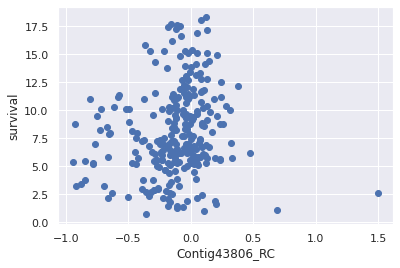

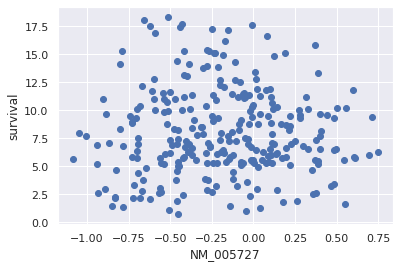

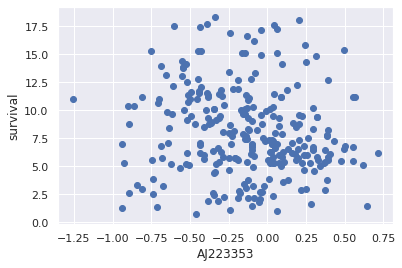

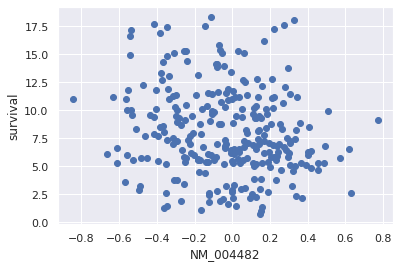

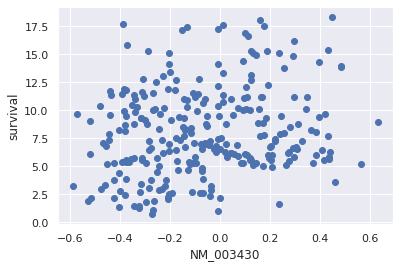

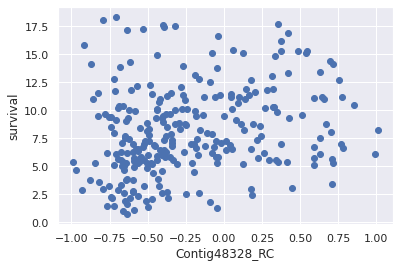

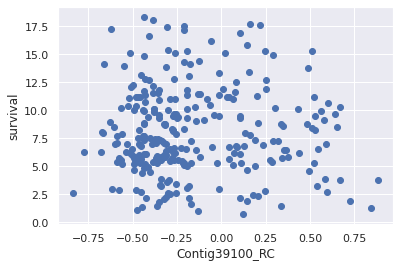

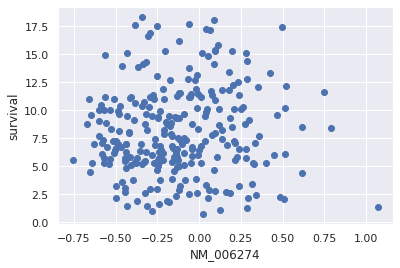

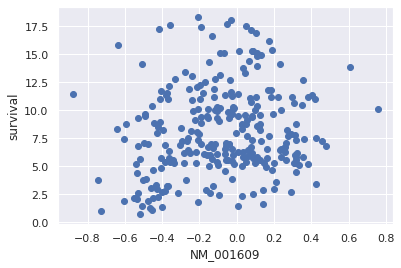

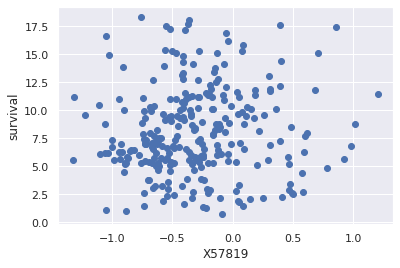

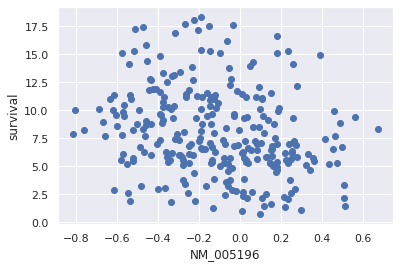

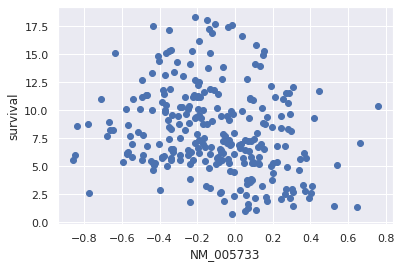

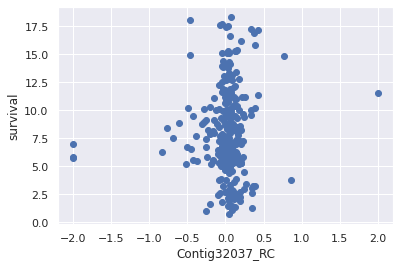

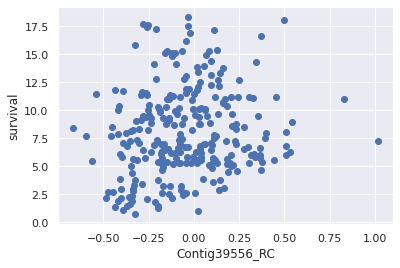

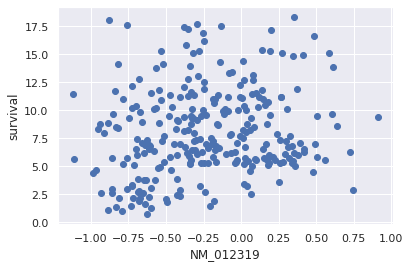

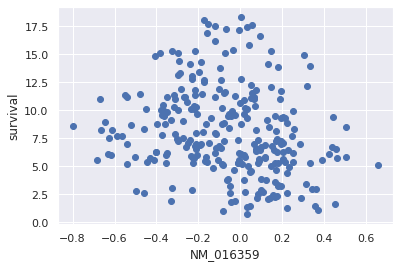

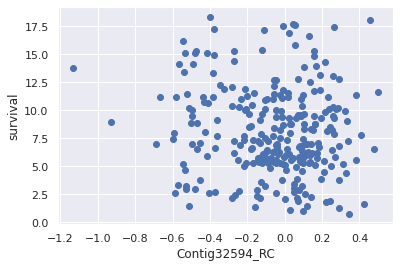

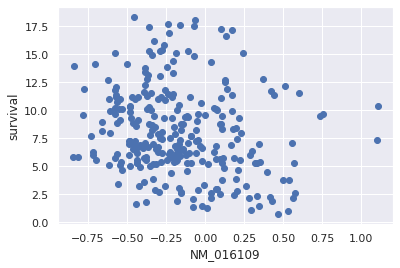

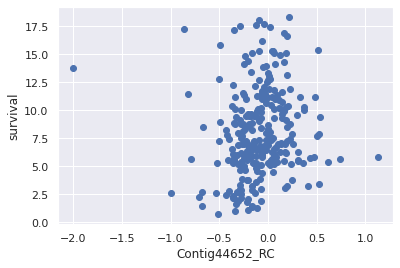

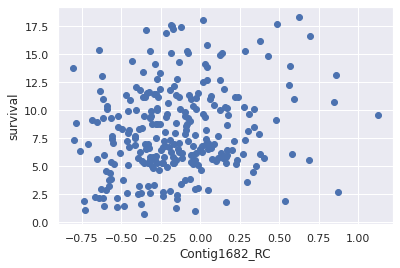

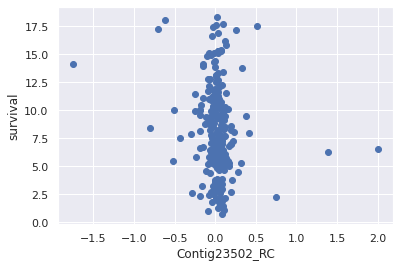

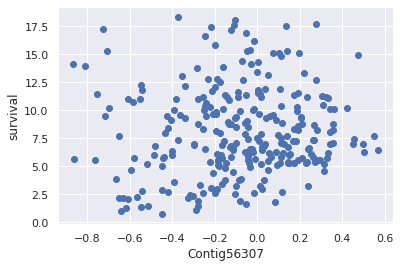

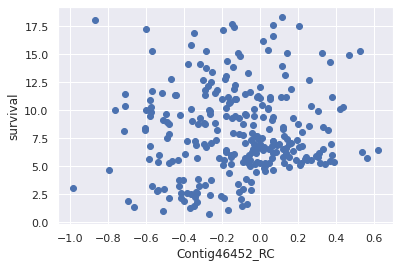

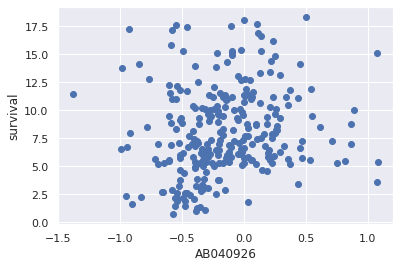

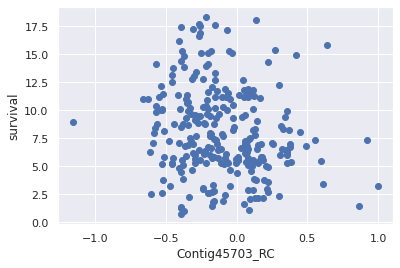

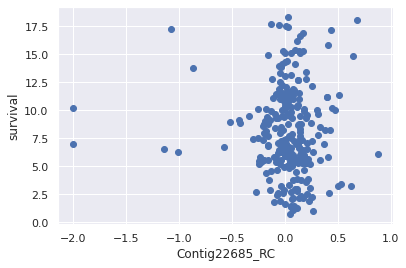

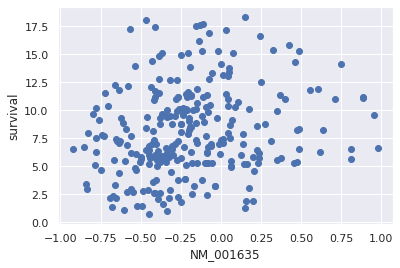

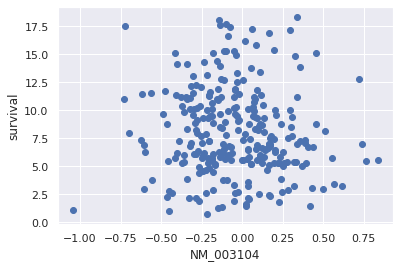

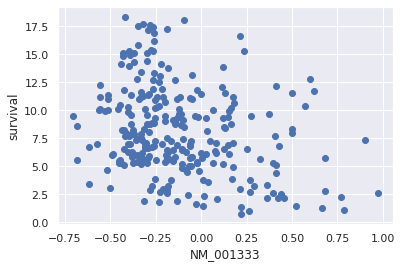

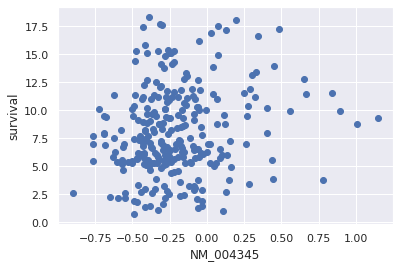

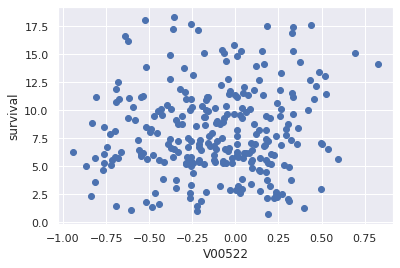

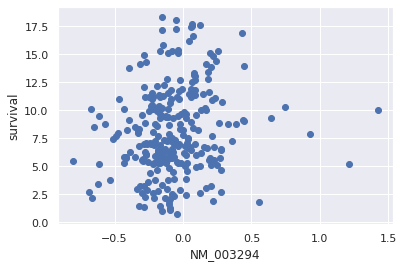

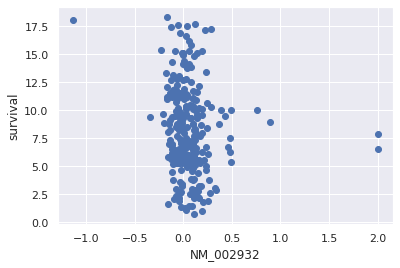

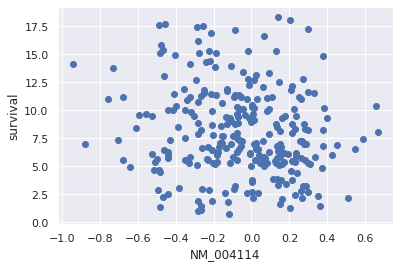

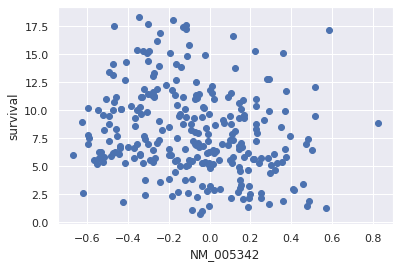

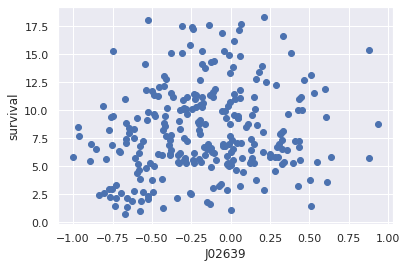

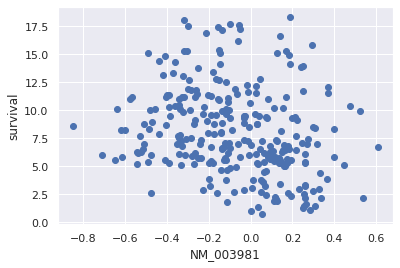

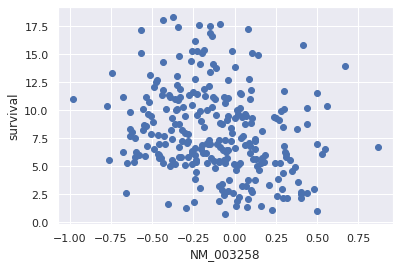

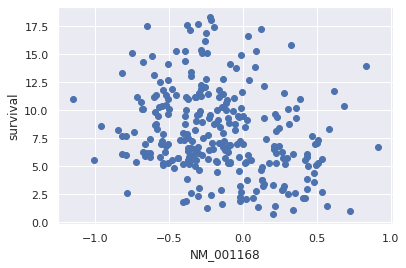

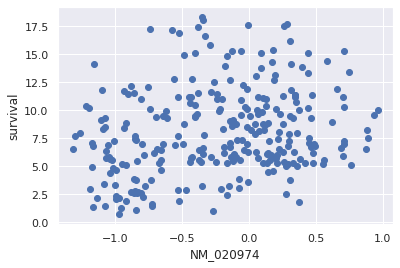

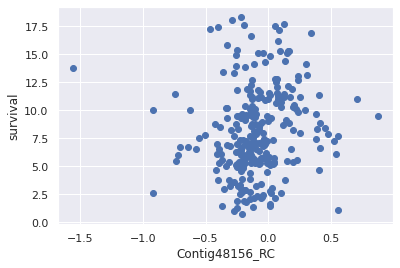

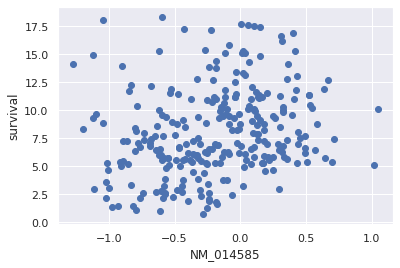

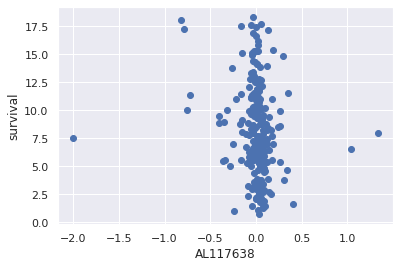

In [ ]:
# x-variable of interest: indexed backwards since the list is in reverse order 
# of interest 
feat_list = i_list[-43:]

# y-variable of interest data as array 
y = df_NKI.loc[:, 'survival']

# iterate through each feature 
for feat in feat_list:
  # plot a new figure 
  plt.figure()

  # make a scatterplot
  plt.scatter(df_NKI.loc[:, feat], y)

  # label x and y axes
  plt.xlabel(feat)
  plt.ylabel('survival')

From some of the scatterplots, you can see a weak positive or negative correlation between the survival and the x-variable, which suggests to some extent, the lower or higher values of protein expression determine survival in years. 

## Multiple Regression

In [ ]:
# desired x-variables list 
feat_list = i_list[-43:]

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def disp_regress(df, x_feat_list, y_feat, verbose=True):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        verbose (bool): toggles command line output
        
    Returns:
        reg (LinearRegression): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # x and y variable data as arrays
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)
    
    if verbose:
        # print model   
        model_str = y_feat + f' = {reg.intercept_:.2f}'
        for feat, coef in zip(x_feat_list, reg.coef_):
            s_sign = ' - ' if coef < 0 else ' + '
            model_str += s_sign + f'{np.abs(coef):.2f} {feat}'
        print(model_str)

        # compute / print r2
        r2 = r2_score(y_true=y, y_pred=y_pred)
        print(f'r2 = {r2:.3} (not cross validated)')
    
    return reg


In [ ]:
# call disp_regress to produce multiple regression equation
disp_regress(df=df_NKI, y_feat= 'survival', x_feat_list=feat_list);

In [ ]:
from scipy.stats import pearsonr
import itertools

# find correlation between the top ten x features
x_corr_dict = dict()
for feat_1, feat_2 in itertools.combinations(feat_list, 2):
    corr, _ = pearsonr(df_NKI.loc[:, feat_1], df_NKI.loc[:, feat_2])
    # add the information to a dictionary
    key_name = str(feat_1) + ', ' + str(feat_2)
    x_corr_dict[key_name] = corr

x_corr_dict

In [ ]:
# sort from highest to lowest correlation 
sort_corr = sorted(x_corr_dict, key=lambda dict_key: abs(x_corr_dict[dict_key]), reverse=True)
sort_corr

# display the correlations
for proteins in sort_corr:
  print(proteins, x_corr_dict[proteins])

The r2 value of 0.36 indicates that around 36% of the variability in the survival can be explained by the variability in the top 43 most important x features. However, there does appear to be some correlation between the x variables themselves, such as between NM_001168 and NM_003258 with an r2 value of 0.86. Therefore we must take caution in interpreting the coefficients of the resulting equation for survival. Our equation gives some sense of how the survival of a breast cancer patient can be estimated using the top 43 proteins. 

## LASSO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso


x_feat_list = list(df_NKI_scaled.columns[11:-5])

# get the data
x = df_NKI_scaled.loc[:, x_feat_list].values
y = df_NKI_scaled.loc[:, y_feat].values

# split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

# show best value of penalization chosen by cross validation
model.alpha_

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

# show model coefficients and names
print(list(zip(lasso_best.coef_, x_feat_list)))

In [ ]:
# display r2 values for the model
print('R squared training set', lasso_best.score(X_train, y_train))
print('R squared test set', lasso_best.score(X_test, y_test))

# Discussion 

## Challenges and Future Implications

We faced immense challenge particularly in the beginning of the project. We are all very passionate about the topic of breast cancer so we wanted to do a project surrounding the prediction of some aspect of it. When we looked for datasets regarding breast cancer data, we struggled to find datasets with useful columns and many rows. The dataset we ended up using gave us a balance of both, although still only have nearly 300 rows (which is still very little). Additionally, the dataset has over 1500 columns, which includes a lot of useful columns almost too much. We struggled a lot to determine what to do next - on how to filter to get the most important x-variables out of all the columns. We tried many methods including PCA and LASSO but failed to see a pattern. So, we ended up plotting a feature importance graph using the random forest regressor in order to determine the most important features.

We also struggled with determining which y-variable to use. We originally made all classifier machine learning models predicting eventdeath. However, we realized our results were extremely simplistic and we, rather, wanted to go a more nuanced route. Therefore, we changed to predicting survival in years of breast cancer patients after diganosis. This is a more nuanced approach but does bring up some problems. For instance, if a breast cancer patient has survived about 8 years at the time of the data collection and is still alive, they may continue to live longer, so the years would increase. We originally did not realize this issue with our chosen y-variable. Therefore, we made careful conclusions with our results. Also, the models made were not good. But, we were able to make it a little better from the initial models. This only emphasizes the fact that breast cancer is very complex and predicting it is not easy as it also is influenced by other factors like lifestyle risk factors (smoking, alcohol consumption, time spent in the sun) and inhereited risk factors. We did, however, did our best to improve the initial model given our abilities. 

We also want to mention that we could not find definitions for the columns anywhere on the website. Therefore, we had to assume the definitions of the columns. 

With regards to future implications, our research can be seen as an attempt for prediction that resulted in models that weren't the best given the x-variables. This can influence other researchers to explore into other x-variables that are known to significantly impact survival outcomes, use dataset with defined columns, and find a dataset with more patients. 

# Ethical Considerations

When predicting breast cancer survival there are several ethical considerations to account for. Although our analysis was inconclusive and should not be used to predict survival of breast cancer patients, we need to consider if the ethicality behind our motivation. Is it ethical to attempt to predict the length of someones life? A discussion that is important to have is if whether disclosing to a patient they only have x years to live would impact their persepctive in facing breast cancer. If a patient is told they have less than a year to live, would that result in a lack of motivation and hope to persevere, succumbing them to the disease? Does the machine learning model hold responsibility for supporting these conclusions? There are circumstances where this information can be useful, but as it pertains to an individuals life the lines of what is helpful as opposed to harmful become blurred.

## Interpretation of the Results

The random forest regressor we made was especially helpful and critical to our analysis because it helped us determine which, out of all 1500+ x-variables, was the most important in predicting our y-variable, survival. It was from this ranked list of the most importance features were we able to improve on all our initial models: k-nearest neighbors, cross validated k-nearest neighbors, decision tree, random forest, PCA, multiple regression, and LASSO. However, with regards to how many of the top features we used was quite subjective. We ended up choosing to use 43 proteins because from trial and error, it seemed to be the smallest number of proteins that lead to the highest cross-validated r2 score for the new random forest regressor. 

The final non-cross validated k-nearest neighbors was still a very bad model, with a negative r2 score. This model should definitely not be used in any cases with predicting survival of breast cancer patients. More manipulation should be done in the x-variables inputted to better predict survival. 

The final cross-validated k-nearest neighbors with an r2 score of about 0.13 shows a weak relationship between the top 43 variables and survival, suggesting that only 13% of the variance of survival can be explained by the top 43 variables. Although the r2 score for this model is not bad relative to the other r2 scores of other models as well as shows improvement from the initial model, it should not be used to predict survival.

The final decision tree we made using only the top 43 variables demonstrates x-variables that are critical in decreasing the mse, giving us a better idea of the most important x-variables for the model. A patient can walk through this decision tree model to see the average years of survival given their input features. However, they should do it with caution as our decision tree model, alike all the models we make, are not good in predicting survival. 

The final random forest we made had an improved r2 score of 0.26, which is the best r2 score across all machine learning models we've made. It means that 26% of the variability in the survival in years can be explained by the top 43 variables. However, despite the r2 score being the strongest out of all models, we believe that this random forest regressor model, in no way, should be used to actually predict survival of breast cancer patients.

The PCA model we made compressed all the top 43 x-variables into one dimension, and then plotted survival vs. this compressed variable. From the plot, there does not appear to be obvious clustering. Overall, it appears that there may be a slight negative correlation between the proteins and survival, though there is no obvious relationship. So, this may indicate that higher overall protein expression is associated with lower survival outcomes. 

The scatterplots between survival and each of the most important x-variables allows us to look at each of the top 43 variables and their possible positive or negative correlation with survival. It was very hard to really see a clear relationship in all the graphs, but for a lot of the variables, there is a weak positive/negative correlation between that x-variable and survival. This can give us insight into the survival of patients with a high expression for that protein vs a low expression for that protein. 

The multiple regression model generates an equation that would be useful for patients who want to look at what their survival in years is given they know the protein expressions they have (based on possibly a report from the doctor after tests). However, this should be taken with caution as the r2 score is a weak 0.36, meaning that only 36% of the variability in survival can be explained by the top 43 variables used in the model. Additionally, we did see some collinearity among the variables we used in the model, as determined by the high correlation coefficients between the proteins, such as a correlation coefficient of 0.86 between protein NM_001168 and NM_003258, meaning that as one protein expression goes up, the other also goes up.

## Takeaway

After all the analysis and discussion, we believe that our project should not be used to predict survival of breast cancer patients. As mentioned before, breast cancer is a multifactorial disease including influence from lifestyle risk factors, inherited risk factors, and many other factors. Direct actions that would be taken as a result of our project is to either get to know the definitions of the columns or find a new dataset that has more records and possibly less columns (only the most importance x-variables).  

# Work Cited

- https://data.world/deviramanan2016/nki-breast-cancer-data
- https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html#:~:text=The%20American%20Cancer%20Society's%20estimates,will%20die%20from%20breast%20cancer. 
- https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe 
- https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars 
- https://seaborn.pydata.org/generated/seaborn.violinplot.html  